In [1]:
import cProfile
import pstats

from ARGUS_Needle_Network import ARGUS_Needle_Network

In [2]:
img_dir = "../../Data_PNB/Preprocessed"
anno_dir = "../../Data_PNB/annotations/Sean_May22_CLEANED"

In [3]:
nnet = ARGUS_Needle_Network()
nnet.setup_vfold_files(img_dir, anno_dir)

vfold_num = 0
run_num = 0
device_num = 0

3.24485379178077 gibibyte
0.021044844761490822 gibibyte
Num images / labels = 30 30
0 [[' 11'], [' 57']]
1 [[' 46'], [' 136']]
2 [[' 207'], [' 179']]
3 [[' 67'], [' 189']]
4 [[' 93'], [' 204']]
5 [[' 94'], [' 205']]
6 [[' 134'], [' 211'], [' 217']]
7 [[' 222A'], [' 238'], [' 39']]
8 [[' 153'], [' 240'], [' 230']]
9 [[' 193'], [' 54'], [' 191']]
20 7 3
22 6 2
23 5 2
24 4 2
23 4 3
23 5 2
22 5 3
19 5 6
17 9 4
17 10 3


In [4]:
nnet.setup_training_vfold(vfold_num)

../../Data_PNB/Preprocessed\1. 134 AC_Video 1_cropM.mha
         797302 function calls (782285 primitive calls) in 3.101 seconds

   Ordered by: cumulative time
   List reduced from 10039 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    3.101    1.550 c:\src\venv_src_monai\lib\site-packages\IPython\core\interactiveshell.py:3362(run_code)
    215/2    0.000    0.000    3.101    1.550 {built-in method builtins.exec}
        1    0.000    0.000    3.101    3.101 C:\Users\stephen.aylward\AppData\Local\Temp\ipykernel_22700\400692504.py:3(<cell line: 3>)
        1    0.000    0.000    3.101    3.101 C:\src\AnatomicRecon-POCUS-AI\PNB\Experiments\ARUNet-Needle\ARGUS_Needle_Network.py:600(view_training_image)
        2    1.320    0.660    2.862    1.431 C:\src\ITK-Release\Wrapping\Generators\Python\itk\support\extras.py:1122(imread)
 9229/116    0.003    0.000    1.555    0.013 C:\src\ITK-Release\Wrapping\Gene

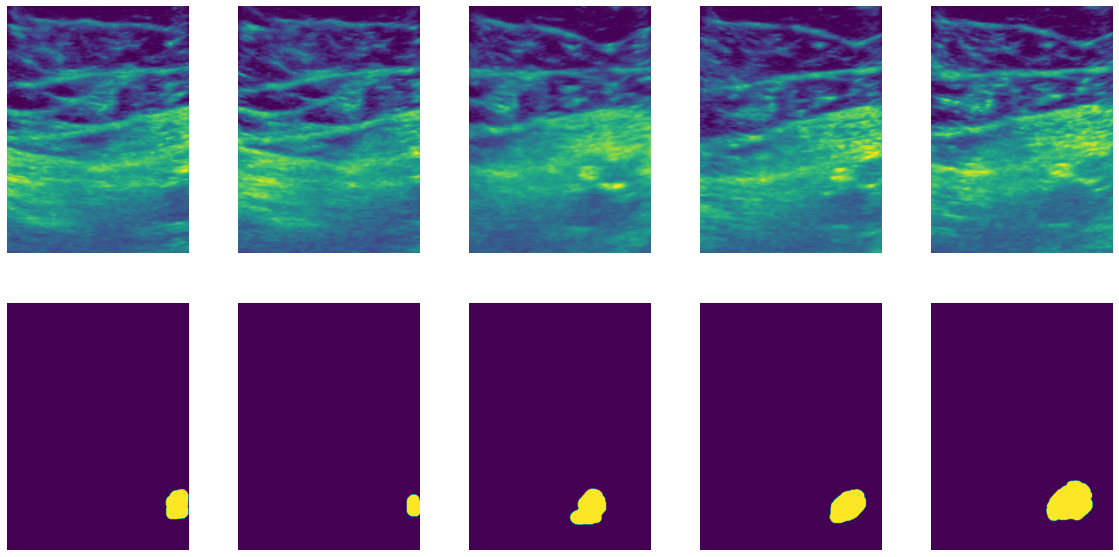

In [5]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_image(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumtime')
stats.print_stats(20)


         1102352 function calls (1086906 primitive calls) in 21.993 seconds

   Ordered by: internal time
   List reduced from 1062 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4   18.474    4.619   18.474    4.619 {built-in method _winapi.WaitForMultipleObjects}
       18    1.148    0.064    1.148    0.064 {built-in method _winapi.WaitForSingleObject}
       42    0.688    0.016    0.688    0.016 {built-in method scipy.ndimage._nd_image.geometric_transform}
     1178    0.407    0.000    0.407    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        8    0.236    0.030    0.237    0.030 {method 'dump' of '_pickle.Pickler' objects}
       84    0.208    0.002    0.208    0.002 {built-in method scipy.ndimage._nd_image.spline_filter1d}
     4831    0.150    0.000    0.150    0.000 {method 'values' of 'dict' objects}
51052/43490    0.019    0.000    0.030    0.000 c:\src\venv_src_monai\lib\site-packages\matplotlib\artis

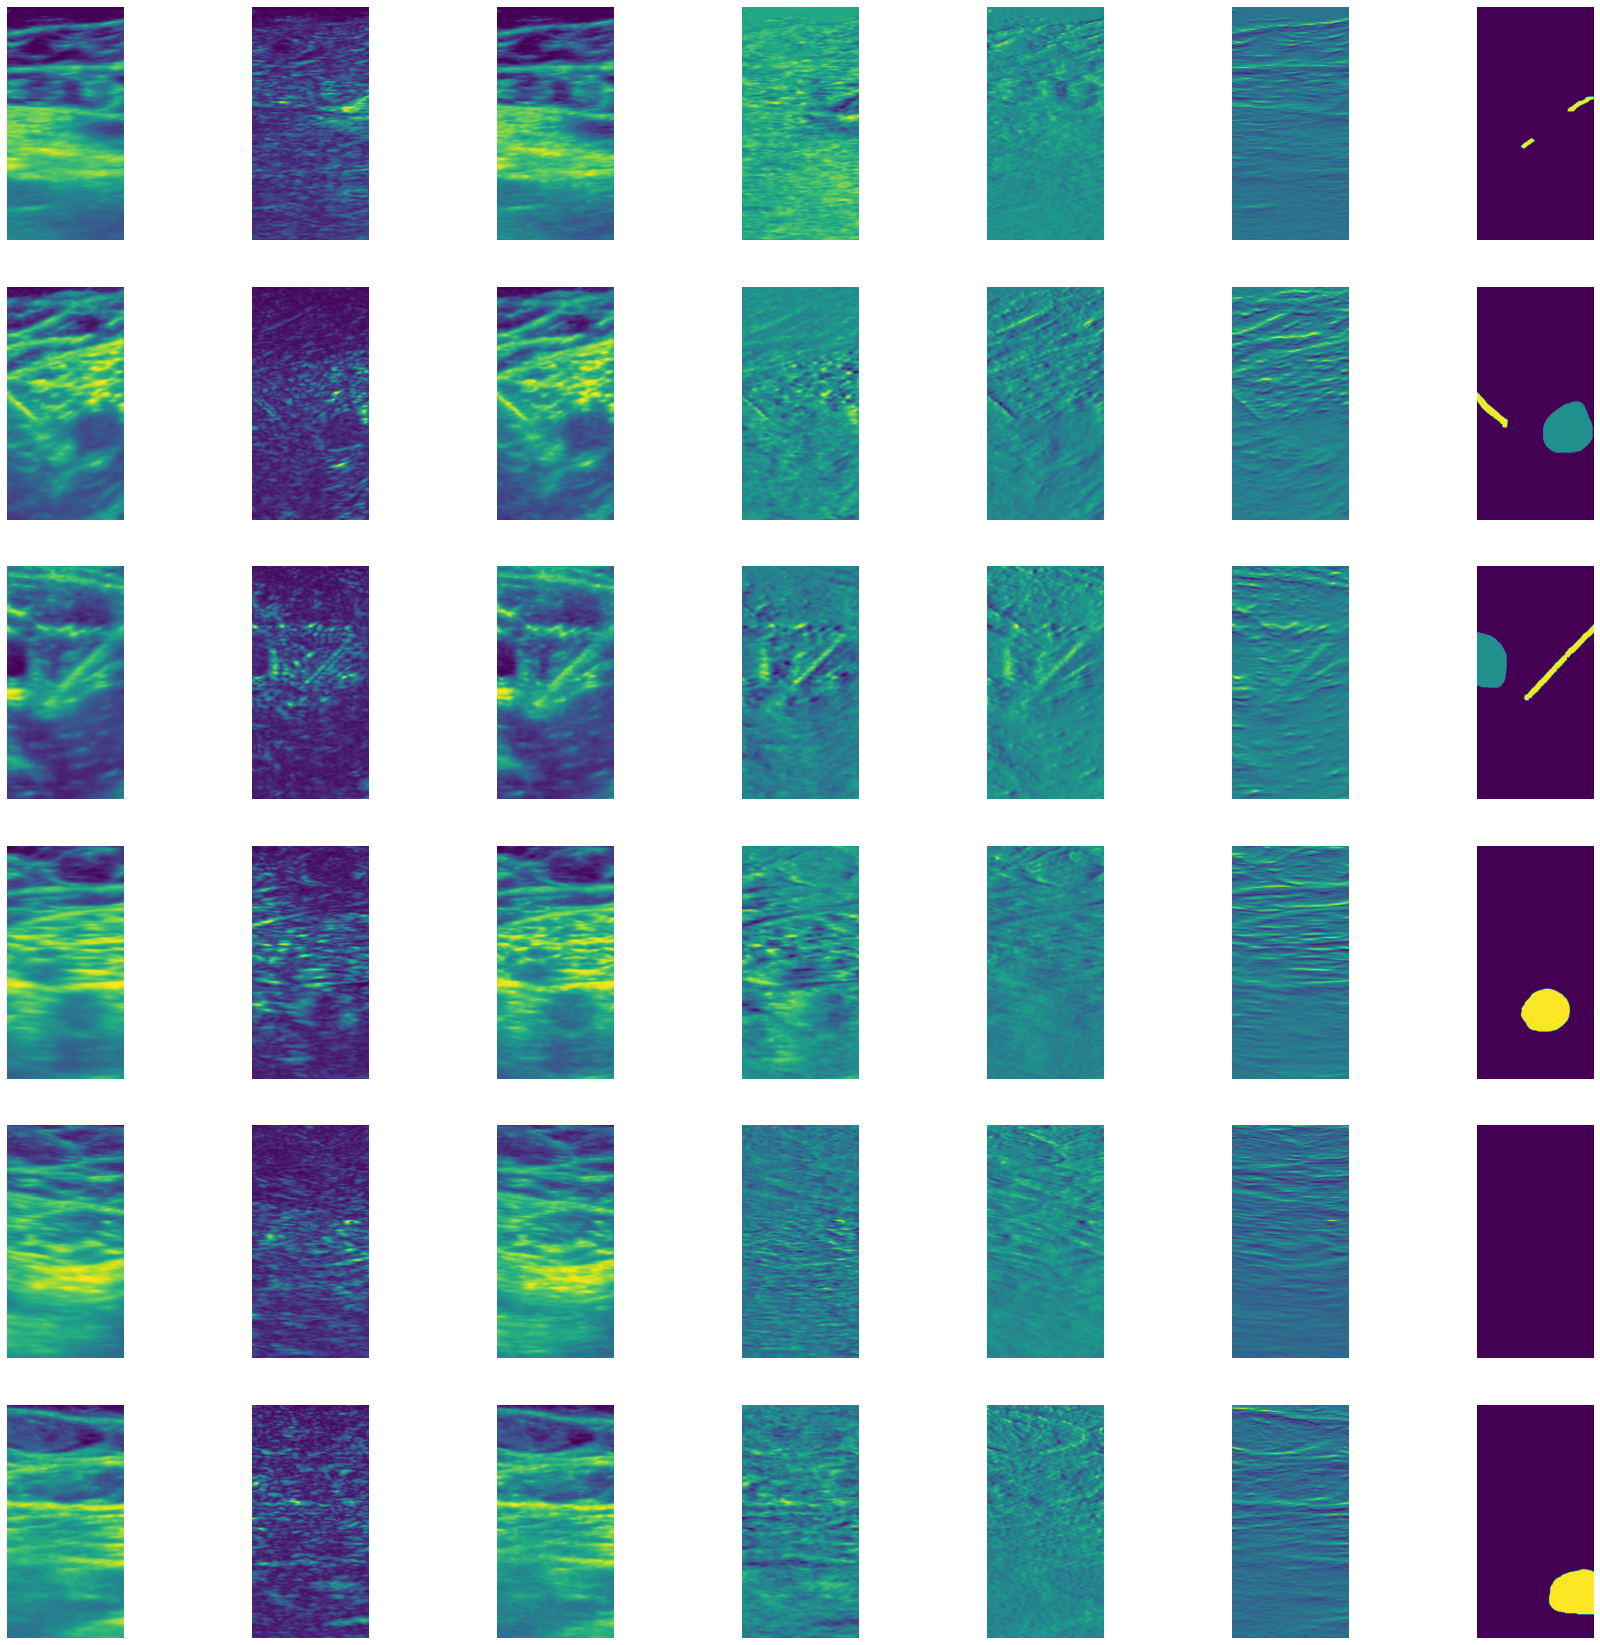

In [6]:
profiler = cProfile.Profile()
profiler.enable()
nnet.view_training_vfold_batch(0)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(40)


In [7]:
profiler = cProfile.Profile()
profiler.enable()
nnet.max_epochs = 5
nnet.train_vfold(run_num,device_num)
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('tottime')
stats.print_stats(100)


----------
0: epoch 1/5
0 / 3, train_loss: 0.8207
1 / 3, train_loss: 0.8063
2 / 3, train_loss: 0.8061
3 / 3, train_loss: 0.8075
0 epoch 1 average loss: 0.8102
----------
0: epoch 2/5
0 / 3, train_loss: 0.8027
1 / 3, train_loss: 0.7984
2 / 3, train_loss: 0.8090
3 / 3, train_loss: 0.7948
0 epoch 2 average loss: 0.8012
----------
0: epoch 3/5
0 / 3, train_loss: 0.8118
1 / 3, train_loss: 0.7919
2 / 3, train_loss: 0.8018
3 / 3, train_loss: 0.7950
0 epoch 3 average loss: 0.8001
----------
0: epoch 4/5
0 / 3, train_loss: 0.8059
1 / 3, train_loss: 0.7948
2 / 3, train_loss: 0.7917
3 / 3, train_loss: 0.8120
0 epoch 4 average loss: 0.8011
----------
0: epoch 5/5
0 / 3, train_loss: 0.7999
1 / 3, train_loss: 0.8004
2 / 3, train_loss: 0.7890
3 / 3, train_loss: 0.8015
0 epoch 5 average loss: 0.7977
         198503 function calls (188470 primitive calls) in 121.825 seconds

   Ordered by: internal time
   List reduced from 629 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  perc